In [49]:
#Import necessary libraries 
import pandas as pd
import numpy as np
import datetime as dt
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yf

In [65]:
# Decide time horizon
end =  dt.datetime.now()                              # dt.datetime.today().strftime("%y-%m-%d")
start = dt.datetime(2013, 1, 1)
end, start

(datetime.datetime(2023, 3, 2, 18, 15, 4, 843203),
 datetime.datetime(2013, 1, 1, 0, 0))

In [66]:
# Give stocklist for the portfolio
stock_list = ["META", "AMZN", "AAPL", "NFLX", "GOOG"]
stocks = [stock for stock in stock_list]
stocks

['META', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

In [67]:
# Get the count of the assets in the portfolio 
num_assets = len(stocks)
print(f"There are {num_assets} assets in your portfolio")

There are 5 assets in your portfolio


In [70]:
yf.pdr_override()

# Create a function to get stock prices in the portfolio 
def assets_portfolio(stocks=stocks, start=start, end=end, col="Adj Close"):
    data = pdr.get_data_yahoo(stocks, start, end)[col]
    return data

# Fetch stock portfolio Adj Close price
stocks_data = assets_portfolio(stocks=stocks)
stocks_data.head()

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2013-01-02,16.837122,12.8655,18.013729,28.000000,13.144286
2013-01-03,16.624592,12.9240,18.024191,27.770000,13.798571
2013-01-04,16.161530,12.9575,18.380356,28.760000,13.711429
2013-01-07,16.066450,13.4230,18.300158,29.420000,14.171429
2013-01-08,16.109692,13.3190,18.264042,29.059999,13.880000


[*********************100%***********************]  5 of 5 completed


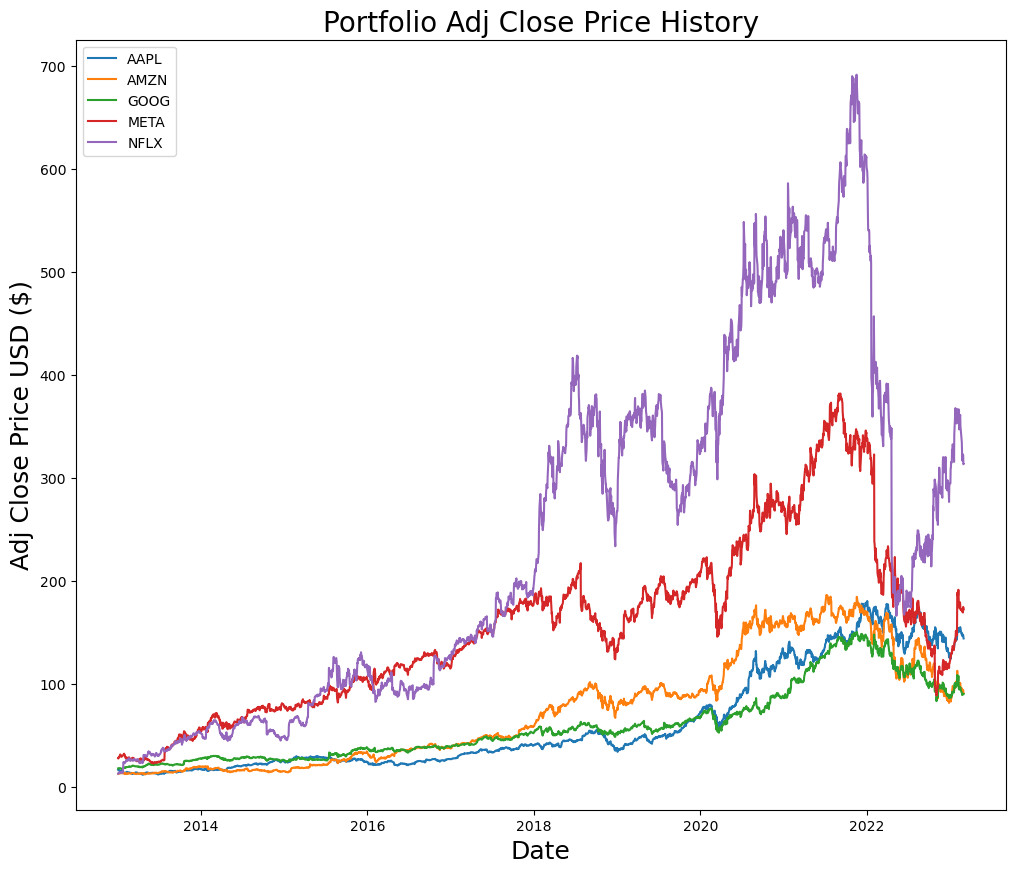

In [69]:
# Create a function to visualize the portfolio
def show_graph(stocks=stocks, start=start, end=end, col="Adj Close"):
    
    # Create a title for the portfolio
    title = f"Portfolio {col} Price History"
    
    # Get the stocks 
    stocks_data = assets_portfolio(stocks=stocks, start=start, end=end, col=col)
    
    # Decide on the size of the graph 
    plt.figure(figsize=(12, 10))
    
    # Loop through each stock in the stock_list and plot price
    for stock in stocks_data.columns.values:
        plt.plot(stocks_data[stock], label = stock)
        
    plt.title(title, fontsize = 20)
    plt.xlabel("Date", fontsize=18)
    plt.ylabel(col+" Price USD ($)", fontsize = 18)
    plt.legend(stocks_data.columns.values, loc="upper left")
    plt.show()

# Show the adjusted close price for stock
show_graph(stocks)

In [72]:
# Calculate simple returns 
daily_simple_returns = stocks_data/stocks_data.shift(1) -1
daily_simple_returns.head().dropna()

,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2013-01-03,-0.012623,0.004547,0.000581,-0.008214,0.049777
2013-01-04,-0.027854,0.002592,0.019760,0.035650,-0.006315
2013-01-07,-0.005883,0.035925,-0.004363,0.022949,0.033549
2013-01-08,0.002691,-0.007748,-0.001974,-0.012237,-0.020565


In [73]:
#Show stock correlation 
# Correlation of 1: Perfect positive correlation
# Correlation of -1: Perfect negative correlation 
daily_simple_returns.corr()


,AAPL,AMZN,GOOG,META,NFLX
AAPL,1.000000,0.504699,0.570726,0.478430,0.317297
AMZN,0.504699,1.000000,0.632618,0.544040,0.477709
GOOG,0.570726,0.632618,1.000000,0.597793,0.431005
META,0.478430,0.544040,0.597793,1.000000,0.406527
NFLX,0.317297,0.477709,0.431005,0.406527,1.000000


In [74]:
# Show stock covariance matrix 
# Diagonal entries in the matrix are variance (Variance shows spread of data from its mean)
# Higher variance:- higher risk, higher returns and higher volatility
# Lower variance:- lower risk, lower returns and lower volatility 

# remaining values represent cov (Efficient Frontier: )
daily_simple_returns.cov()

,AAPL,AMZN,GOOG,META,NFLX
AAPL,0.000334,0.000191,0.000180,0.000213,0.000174
AMZN,0.000191,0.000427,0.000226,0.000274,0.000296
GOOG,0.000180,0.000226,0.000298,0.000252,0.000223
META,0.000213,0.000274,0.000252,0.000595,0.000298
NFLX,0.000174,0.000296,0.000223,0.000298,0.000900


In [75]:
# Show variance 
daily_simple_returns.var()

AAPL    0.000334
AMZN    0.000427
GOOG    0.000298
META    0.000595
NFLX    0.000900
dtype: float64

In [76]:
# Standard Deviation for the daily returns 
print("Stock Volatility")
daily_simple_returns.std()

Stock Volatility


AAPL    0.018274
AMZN    0.020662
GOOG    0.017263
META    0.024395
NFLX    0.030002
dtype: float64

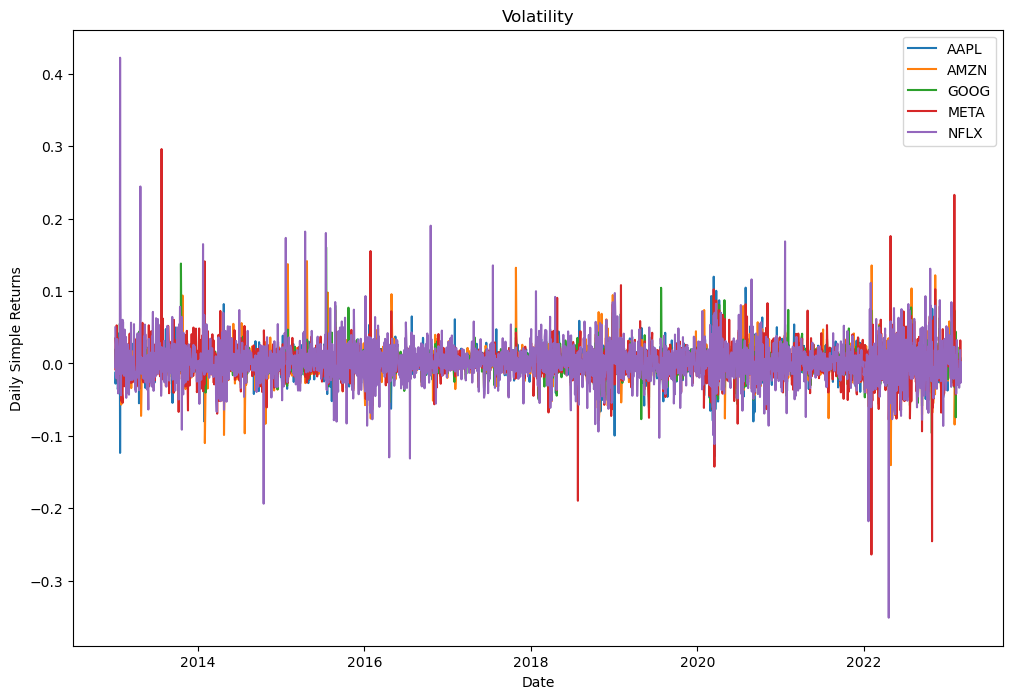

In [84]:
# Visualise stock daily simple returns/volatilty 

plt.figure(figsize = (12, 8))

# Loop through each stock in the stoclist 
for stock in daily_simple_returns.columns.values:
    plt.plot(daily_simple_returns.index, daily_simple_returns[stock], label=stock)
plt.legend(daily_simple_returns, loc="upper right")
plt.title("Volatility")
plt.xlabel("Date")
plt.ylabel("Daily Simple Returns")
plt.show()

In [91]:
# calcuate the mean of simple daily returns 
print("Mean of Daily Simple Returns")
mean_daily_simple_returns = daily_simple_returns.mean()
mean_daily_simple_returns

Mean of Daily Simple Returns


AAPL    0.001008
AMZN    0.000980
GOOG    0.000779
META    0.001010
NFLX    0.001688
dtype: float64

In [93]:
# Calculate expected portfolio daily returns 
weights = [0.3, 0.2, 0.2, 0.15, 0.15] #30%- Apple, 20% -Amazon, 20% - Google, 15% - Meta, 15% - Netflix

portfolio_daily_return = np.sum(mean_daily_simple_returns * weights)
print(f"Daily Expected Portfolio Return: {portfolio_daily_return}")

Daily Expected Portfolio Return: 0.0010607176135976188


In [94]:
# Calculate Annual simple returns 
print(f"Annualised expected portfolio simple returns:  {portfolio_daily_return*252} ")

Annualised expected portfolio simple returns:  0.2673008386265999 


In [103]:
# Calculate the growth of investment 
daily_cumulative_simple_return = (daily_simple_returns + 1).cumprod()
daily_cumulative_simple_return

,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.987377,1.004547,1.000581,0.991786,1.049777
2013-01-04,0.959875,1.007151,1.020353,1.027143,1.043147
2013-01-07,0.954228,1.043333,1.015901,1.050714,1.078144
2013-01-08,0.956796,1.035249,1.013896,1.037857,1.055972
2013-01-09,0.941843,1.035133,1.020560,1.092500,1.042387
2013-01-10,0.953518,1.031207,1.025206,1.117857,1.065102
2013-01-11,0.947671,1.041312,1.023146,1.132857,1.100859
2013-01-14,0.913885,1.059928,1.000000,1.105357,1.124334


In [96]:
pd.set_option("display.max_rows", 2559)

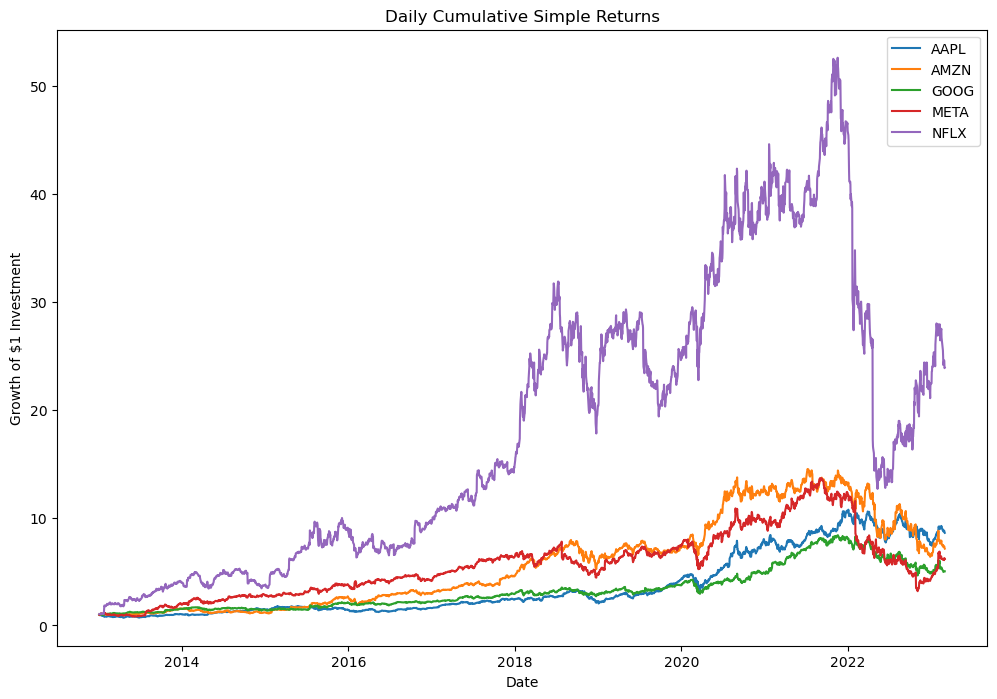

In [105]:
# Visualise Daily Cumulative Simple Returns

plt.figure(figsize=(12,8))
for column in daily_cumulative_simple_return.columns.values:
    plt.plot(daily_cumulative_simple_return.index, daily_cumulative_simple_return[column], label=column)
plt.legend(loc="upper right", fontsize=10)
plt.title("Daily Cumulative Simple Returns")
plt.xlabel("Date")
plt.ylabel("Growth of $1 Investment")
plt.show()